In [1]:
import pandas as pd
import geopandas as gpd

In [44]:
data = gpd.read_file('street_mismatch.geojson')
data = data.to_crs("EPSG:4326")
data = data.dropna()
data

,street_id,st_width,st_length,full_stree,bike_lane,food_review_num_mean,food_review_star,food_count,retail_review_num_mean,retail_review_star,...,logretailvis,logartvis,diversity,logstorediversity,star_sq,logvisit_predict,mismatch,visit_predict,mismatch_log,geometry
1,1,30.0,735.721079,BENNETT AVE,0.0,388.000000,4.000000,1.0,4.0,4.000,...,5.802118,0.000000,57.938016,-0.545796,16.000000,7.896890,1266.906993,2687.906993,-0.637070,"LINESTRING (-73.93666 40.85045, -73.93620 40.8..."
3,3,14.0,159.149459,GOLD ST,3.0,107.000000,2.500000,1.0,0.0,0.000,...,0.000000,0.000000,0.000000,-inf,6.250000,4.594082,-3669.102649,97.897351,3.640217,"LINESTRING (-74.00684 40.70786, -74.00653 40.7..."
4,4,30.0,508.092565,E 109 ST,0.0,0.000000,0.000000,0.0,0.0,0.000,...,0.000000,8.557951,57.938016,-0.545796,25.000000,6.668592,-4420.713324,786.286676,1.889359,"LINESTRING (-73.94969 40.79622, -73.94919 40.7..."
5,5,68.0,257.894368,EIGHTH AVE,1.0,45.500000,3.250000,2.0,0.0,0.000,...,0.000000,0.000000,57.938016,-0.545796,10.562500,8.067655,-94.385170,3188.614830,0.029162,"LINESTRING (-73.99575 40.74905, -73.99530 40.7..."
7,7,35.0,714.075356,E 61 ST,0.0,111.000000,2.500000,1.0,142.0,3.500,...,7.729296,7.094235,86.497352,-0.145056,9.000000,9.374976,8311.629741,11788.629741,-1.220763,"LINESTRING (-73.96107 40.76086, -73.95881 40.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13068,13120,32.0,267.561496,B AVE,0.0,16.000000,4.000000,1.0,0.0,0.000,...,6.251904,0.000000,63.092975,-0.460561,16.000000,7.690608,945.705287,2186.705287,-0.566130,"LINESTRING (-73.97854 40.72875, -73.97806 40.7..."
13069,13121,58.0,286.107372,SEVENTH AVE,1.0,144.000000,2.500000,1.0,0.0,0.000,...,7.190676,0.000000,51.185951,-0.669705,6.250000,7.662870,-1990.145436,2126.854564,0.660253,"LINESTRING (-74.00018 40.73786, -73.99968 40.7..."
13072,13124,70.0,257.939836,3 AVE,0.0,236.333333,3.416667,6.0,193.0,4.000,...,0.000000,0.000000,0.000000,-inf,12.250000,5.798455,-1778.210306,328.789694,1.855040,"LINESTRING (-73.98131 40.74135, -73.98086 40.7..."
13073,13125,26.0,473.507396,ORCHARD ST,0.0,181.666667,3.666667,3.0,53.5,3.375,...,7.097549,0.000000,61.668198,-0.483402,12.250000,8.915547,3250.853688,7445.853688,-0.573660,"LINESTRING (-73.98973 40.71910, -73.98963 40.7..."


In [53]:
data.store_num.min()

1.0

In [54]:
data_extract = data[['street_id', 'store_num', 'full_stree', 'mismatch_log', 'review_num_tot', 'total_visit', 'geometry']]
data_extract = data_extract.reset_index(drop=True)
data_extract

,street_id,store_num,full_stree,mismatch_log,review_num_tot,total_visit,geometry
0,1,2.0,BENNETT AVE,-0.637070,3.92,1421.0,"LINESTRING (-73.93666 40.85045, -73.93620 40.8..."
1,3,1.0,GOLD ST,3.640217,1.07,3767.0,"LINESTRING (-74.00684 40.70786, -74.00653 40.7..."
2,4,1.0,E 109 ST,1.889359,0.01,5207.0,"LINESTRING (-73.94969 40.79622, -73.94919 40.7..."
3,5,2.0,EIGHTH AVE,0.029162,0.91,3283.0,"LINESTRING (-73.99575 40.74905, -73.99530 40.7..."
4,7,2.0,E 61 ST,-1.220763,2.53,3477.0,"LINESTRING (-73.96107 40.76086, -73.95881 40.7..."
...,...,...,...,...,...,...,...
3371,13120,1.0,B AVE,-0.566130,0.16,1241.0,"LINESTRING (-73.97854 40.72875, -73.97806 40.7..."
3372,13121,1.0,SEVENTH AVE,0.660253,1.44,4117.0,"LINESTRING (-74.00018 40.73786, -73.99968 40.7..."
3373,13124,7.0,3 AVE,1.855040,16.11,2107.0,"LINESTRING (-73.98131 40.74135, -73.98086 40.7..."
3374,13125,7.0,ORCHARD ST,-0.573660,7.59,4195.0,"LINESTRING (-73.98973 40.71910, -73.98963 40.7..."


In [55]:
data_extract.to_file("street_mismatch_extract.geojson", driver='GeoJSON')

In [42]:
data.mismatch_log.max()

4.9450609283363205

In [43]:
list(data.geometry[0].coords)

[(-73.92252451233148, 40.85951807240053),
 (-73.92239284071913, 40.85943727403871),
 (-73.92176082392076, 40.85862460651696),
 (-73.92173036266094, 40.85799509934181),
 (-73.92181967101008, 40.857859787226786)]

In [22]:
[i[0] for i in list(data.geometry[0].coords)]

[1005681.0230102552,
 1005717.4718017534,
 1005892.5635986326,
 1005901.1948242176,
 1005876.5339965805]

In [40]:
for feature in list(data.iloc)[5]:
    print(feature)
    print([j[0] for j in list(feature.geometry.coords)])
# print(data.iloc[1:10])

5


AttributeError: 'numpy.int64' object has no attribute 'geometry'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7508bea50>]],
      dtype=object)

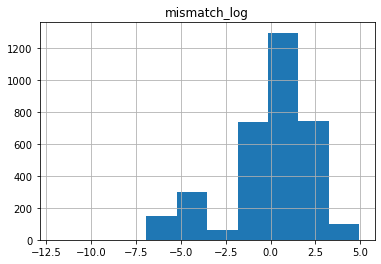

In [20]:
data.hist('mismatch_log')